##### Import data

In [1]:
from util_copy import load_fabric_data, extract_label_grouping, extract_label_grouping, load_fabric_images
import numpy as np
from matplotlib import image

In [2]:

path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/label_json/**/**.json"

fids, fdata = load_fabric_data(path)
ftype1, ftype2 = extract_label_grouping(fdata)


In [3]:
path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/"
labels, imgs = load_fabric_images(path, fids, fdata, ftype2)


C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/**/**.jpg


In [ ]:
print(fdata)

In [4]:
print(len(labels))
print(imgs[0])

3371
[[[130 130 128 155 147 171]
  [139 137 138 151 150 168]
  [147 145 148 146 154 167]
  ...
  [ 57  46  24  92  87  29]
  [ 73  51  28  83  64  34]
  [124  89  69  76  47  51]]

 [[139 141 140 162 153 174]
  [143 144 146 157 155 168]
  [148 148 150 151 155 166]
  ...
  [ 69  61  38 121 124  69]
  [ 58  41  15 113 100  56]
  [ 69  39  15  88  63  33]]

 [[143 147 150 160 149 166]
  [145 149 152 156 153 162]
  [150 151 156 153 156 161]
  ...
  [102 100  75 153 160 116]
  [ 90  79  49 140 133  79]
  [ 75  55  22 126 106  47]]

 ...

 [[ 56  19  13  76  21  24]
  [ 55  16  11  77  28  31]
  [ 57  18  13  70  31  32]
  ...
  [208 213 219 210 213 206]
  [208 218 220 222 223 228]
  [200 210 211 216 213 234]]

 [[ 74  35  28 103  31  34]
  [ 69  30  23 103  37  39]
  [ 72  31  25  95  39  40]
  ...
  [191 200 209 212 212 212]
  [220 231 237 209 209 221]
  [196 210 213 213 210 237]]

 [[ 87  49  40 122  36  37]
  [ 82  42  34 123  41  43]
  [ 85  45  37 115  43  46]
  ...
  [185 193 204 214 

In [5]:
n_samples = len(imgs)
print("Number of samples:", n_samples)

Number of samples: 3371


In [6]:
print(imgs[1230].shape)

(400, 400, 6)


##### Padding
- https://blog.csdn.net/wuzqChom/article/details/74785643
- https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
- https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

In [7]:
import cv2

In [8]:
imgs = [cv2.resize(img,(200, 200)) for img in imgs]

##### Split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.3, random_state=1)

In [11]:
print(train_images.type)

AttributeError: 'list' object has no attribute 'type'

In [12]:
print("#Training data: {}\n#Testing data: {}\n#Class: {}".format(len(train_images), len(test_images), len(set(train_labels))))

#Training data: 2359
#Testing data: 1012
#Class: 9


##### Normalize data

In [13]:
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [14]:
train_images.shape

(2359, 200, 200, 6)

##### Generate fake data

##### Create model
- https://www.tensorflow.org/tutorials/images/classification

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [16]:
input_shape = (200, 200, 6)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      1760      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
74/74 [==============================] - 154s 2s/step - loss: 1.9404 - accuracy: 0.3192 - val_loss: 1.6095 - val_accuracy: 0.4051
Epoch 2/10
74/74 [==============================] - 142s 2s/step - loss: 1.4472 - accuracy: 0.5108 - val_loss: 1.4994 - val_accuracy: 0.5010
Epoch 3/10
74/74 [==============================] - 141s 2s/step - loss: 1.1039 - accuracy: 0.6435 - val_loss: 1.2766 - val_accuracy: 0.5692
Epoch 4/10
74/74 [==============================] - 133s 2s/step - loss: 0.8079 - accuracy: 0.7401 - val_loss: 1.3319 - val_accuracy: 0.6225
Epoch 5/10
74/74 [==============================] - 145s 2s/step - loss: 0.6197 - accuracy: 0.8080 - val_loss: 1.4718 - val_accuracy: 0.6047
Epoch 6/10
74/74 [==============================] - 131s 2s/step - loss: 0.5022 - accuracy: 0.8453 - val_loss: 1.3547 - val_accuracy: 0.6176
Epoch 7/10
74/74 [==============================] - 127s 2s/step - loss: 0.4095 - accuracy: 0.8771 - val_loss: 1.3166 - val_accuracy: 0.6502
Epoch 8/10
74

##### Testing

32/32 - 15s - loss: 1.5272 - accuracy: 0.6502


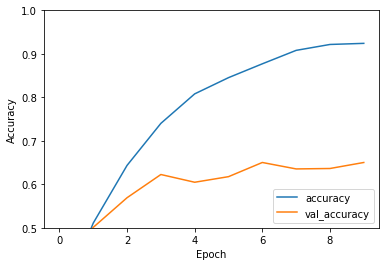

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [21]:
print(test_acc)

0.6501976251602173
